In [1]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import itertools

In [2]:
#Load the data set
a = pd.read_csv('C:/Users/hocha/Documents/Portfolio Models/Prediction/Credit_card_detection.csv', encoding='ISO-8859-1')

a.head()

,ID,Gender,Own_car,Own_property,Work_phone,Phone,Email,Unemployed,Num_children,Num_family,Account_length,Total_income,Age,Years_employed,Income_type,Education_type,Family_status,Housing_type,Occupation_type,Target
0,5008804,1,1,1,1,0,0,0,0,2,15,427500.0,32.868574,12.435574,Working,Higher education,Civil marriage,Rented apartment,Other,1
1,5008806,1,1,1,0,0,0,0,0,2,29,112500.0,58.793815,3.104787,Working,Secondary / secondary special,Married,House / apartment,Security staff,0
2,5008808,0,0,1,0,1,1,0,0,1,4,270000.0,52.321403,8.353354,Commercial associate,Secondary / secondary special,Single / not married,House / apartment,Sales staff,0
3,5008812,0,0,1,0,0,0,1,0,1,20,283500.0,61.504343,0.000000,Pensioner,Higher education,Separated,House / apartment,Other,0
4,5008815,1,1,1,1,1,1,0,0,2,5,270000.0,46.193967,2.105450,Working,Higher education,Married,House / apartment,Accountants,0


 **Observation:**
  
- The dataset contains a mix of demographic, financial, and employment-related features for individual applicants, with both numerical and categorical variables.

- Most individuals shown are employed, with diverse income types (Working, Commercial associate, Pensioner) and occupations, indicating heterogeneous economic backgrounds.

- Total income varies widely, suggesting income will be an important discriminating feature for the target variable.

- Ages range from early 30s to above 60, with years employed not strictly correlated with age (e.g., a pensioner with zero years employed).

- Binary ownership indicators (car, property, phone, email) highlight differences in asset ownership and accessibility, which may influence credit-related outcomes.

- The Target variable is imbalanced in this sample, with most observations labeled as 0, suggesting potential class imbalance in the full dataset.

- Family structure (number of children, family size, marital status) and housing type show variability, indicating potential socio-economic impact on the target outcome.

- Overall, the data reflects realistic socio-economic diversity and provides a strong basis for further exploratory analysis and feature importance evaluation.


In [3]:
# Exploring our data

pd.set_option('display.float_format', lambda x: '%.2f' % x)
a.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9709 entries, 0 to 9708
Data columns (total 20 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   ID               9709 non-null   int64  
 1   Gender           9709 non-null   int64  
 2   Own_car          9709 non-null   int64  
 3   Own_property     9709 non-null   int64  
 4   Work_phone       9709 non-null   int64  
 5   Phone            9709 non-null   int64  
 6   Email            9709 non-null   int64  
 7   Unemployed       9709 non-null   int64  
 8   Num_children     9709 non-null   int64  
 9   Num_family       9709 non-null   int64  
 10  Account_length   9709 non-null   int64  
 11  Total_income     9709 non-null   float64
 12  Age              9709 non-null   float64
 13  Years_employed   9709 non-null   float64
 14  Income_type      9709 non-null   object 
 15  Education_type   9709 non-null   object 
 16  Family_status    9709 non-null   object 
 17  Housing_type  

 **Observation:**

- The dataset has 9,709 rows and 20 columns.

- No missing values in any column.

- Data types include:

    - 12 integer (mostly binary/count features),

    - 3 float (income, age, years employed),

    - 5 categorical (income, education, family, housing, occupation).

- The Target column is numeric and suitable for classification.

- The data is clean, well-structured, and ready for EDA and machine learning, with only categorical encoding required.

In [4]:
#drop first coulumn since it is not relevant, and check missing values

a = a.drop('ID', axis=1) 

a.isnull().values.any()

False

Gender
0    6323
1    3386
Name: count, dtype: int64


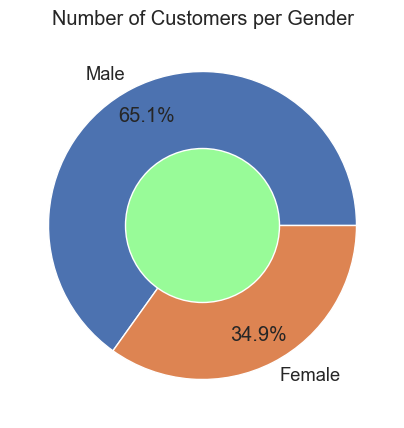

In [5]:
#Check distribution by Gender

g = a['Gender'].value_counts()

sns.set(font_scale = 1.2)
plt.figure(figsize=(5,5))

plt.title("Number of Customers per Gender")
labels = ['Male','Female']

g = a['Gender'].value_counts()
print(g)

plt.pie(g,  labels=labels, autopct='%1.1f%%', pctdistance=0.80)
cc = plt.Circle((0, 0), 0.50, fc='palegreen')
fig = plt.gcf()
fig.gca().add_artist(cc)
plt.ylabel('')
plt.show()


 **Observation:**

- The are 65.1% male and 34.9% female.

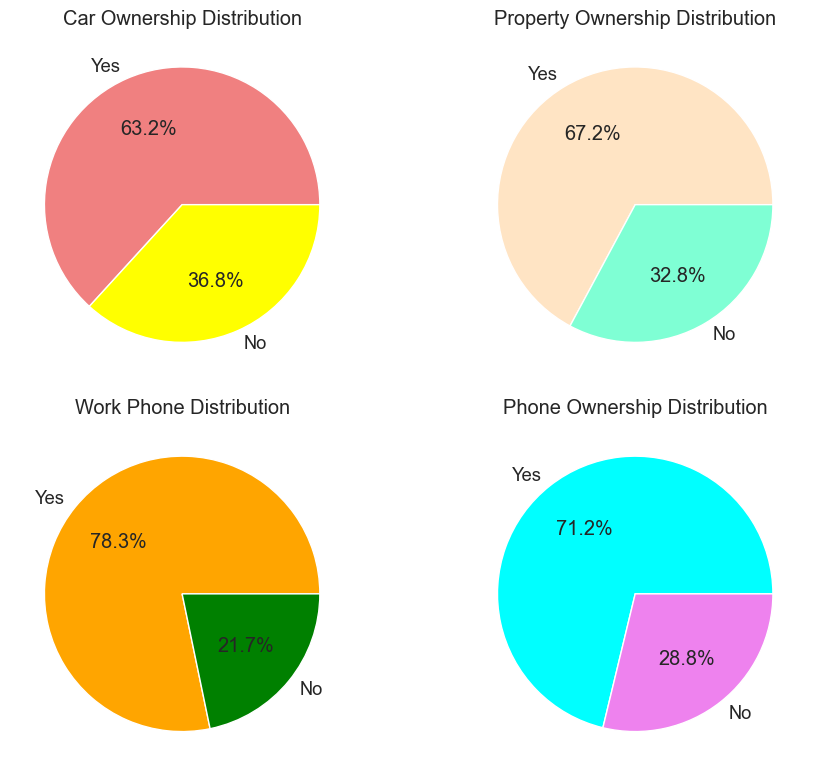

In [6]:
# Creating Multiple Subplots for Car, Property, Work_phone and Phone
fig, axes = plt.subplots(nrows = 2, ncols = 2, figsize=(10, 8))

labels = ['Yes','No']

# Customers who own Cars
axes[0, 0].pie(a['Own_car'].value_counts(), labels = labels, autopct='%1.1f%%', colors=['lightcoral', 'yellow'])
axes[0, 0].set_title('Car Ownership Distribution')

 
# Customers who own Property
axes[0, 1].pie(a['Own_property'].value_counts() , labels = labels, autopct='%1.1f%%', colors=['bisque', 'aquamarine'])
axes[0, 1].set_title('Property Ownership Distribution')


# Customers who have work phone
axes[1, 0].pie(a['Work_phone'].value_counts() , labels = labels, autopct='%1.1f%%', colors=['orange',  'green'])
axes[1, 0].set_title('Work Phone Distribution')

# Customers who owns phone
axes[1, 1].pie(a['Phone'].value_counts() , labels = labels, autopct='%1.1f%%', colors=['cyan', 'violet'])
axes[1, 1].set_title('Phone Ownership Distribution')

plt.tight_layout()
plt.show()

 **Observation:**

- 63.2% of customers own a car, while 36.8% do not.
- 67.2% of customers own property, compared to 32.8% who do not.
- 78.3% of customers have a work phone, whereas 21.7% do not.
- 71.2% of customers own a personal phone, while 28.8% do not.

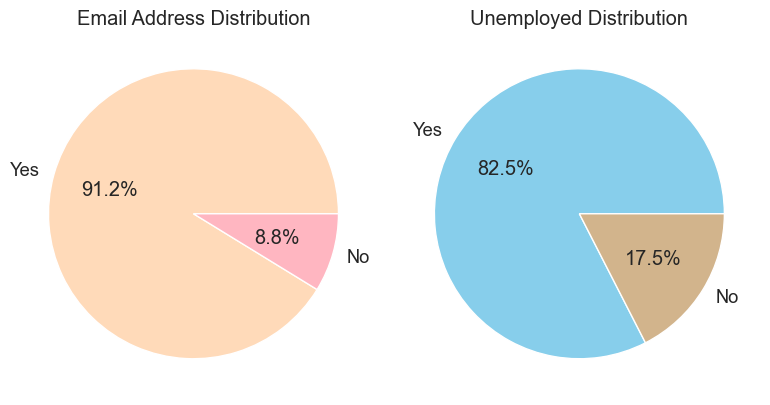

In [7]:
# Creating Subplots for Eamil and Unemployement Status
fig, axes = plt.subplots(nrows = 1, ncols = 2, figsize=(8, 5))

labels = ['Yes','No']

# Customers with Email Address
axes[0].pie(a['Email'].value_counts(), labels = labels, autopct='%1.1f%%', colors=['peachpuff', 'lightpink'])
axes[0].set_title('Email Address Distribution')
cc = plt.Circle((0, 0), 0.40, fc='white')
fig = plt.gcf()
fig.gca().add_artist(cc)

# Customers' Employment Status
axes[1].pie(a['Unemployed'].value_counts() , labels = labels, autopct='%1.1f%%', colors=['skyblue', 'tan'])
axes[ 1].set_title('Unemployed Distribution')

plt.tight_layout()
plt.show()

 **Observation:**

- 91.2% of customers have an email, while 8.8% do not.
- 82.5% of customers are employed, compared to 17.5% who are unemployed.

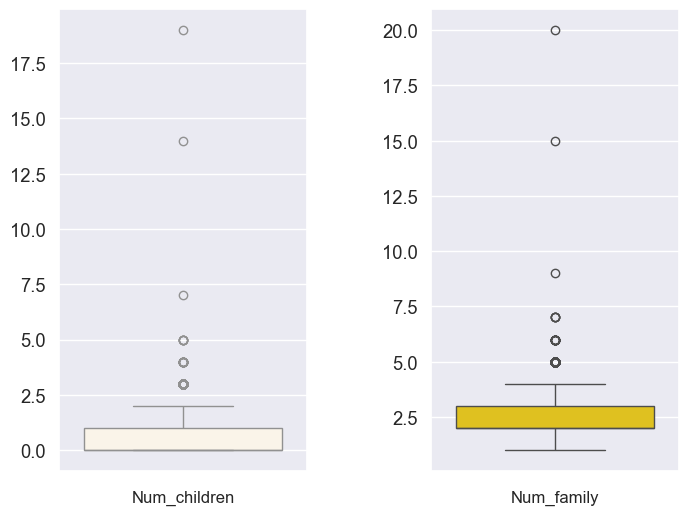

In [8]:
# Create boxplots for Num_Children and Num_family and check outliers in these categories.
fig, ax = plt.subplots(1, 2, figsize = (8, 6))
 
# Create space between the plots
plt.subplots_adjust(wspace = 0.5) 
 
# Plot boxplot for Num_children in the 1st subplot
sns.boxplot(data = a['Num_children'], ax = ax[0], color ='oldlace')
ax[0].set_xlabel('Num_children', fontsize = 12)
ax[0].set_ylabel('')
 
# Plot boxplot for Num_famil in the second subplot
sns.boxplot(data = a['Num_family'], ax = ax[1], color = 'gold')
ax[1].set_xlabel('Num_family', fontsize = 12)
ax[1].set_ylabel('')
 

for subplot in ax:
    subplot.set_xticklabels([])
    
plt.show()


 **Observation:**

**Num_children:**

- The median is very low (around 0), indicating most customers have no or very few children.
- The distribution is right-skewed, with several high outliers, meaning a small number of customers have many children.
- The narrow box shows low variability for the majority of customers.

**Num_family:**

- The median is around 2–3, suggesting typical household sizes of small families.
- There is more spread than in Num_children, indicating greater variation in family size.
- Several upper outliers exist, showing a few customers belong to unusually large households.

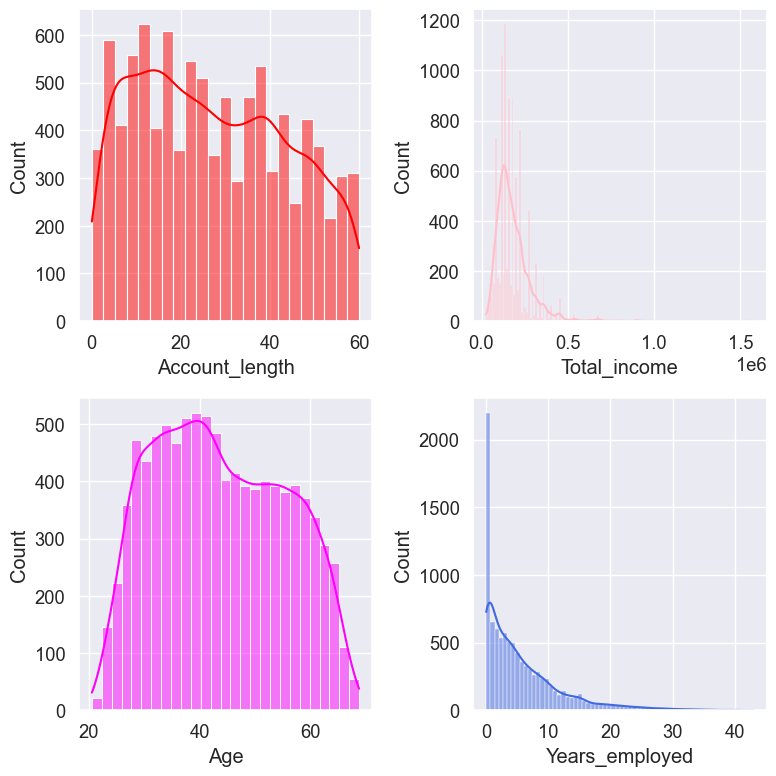

In [9]:
# Checking how Account_length, Total_Income, Age and Years_employed are distributed

fig, axs = plt.subplots(2, 2, figsize=(8, 8))

sns.histplot(data = a, x = 'Account_length', kde = True,  color = 'red', ax = axs[0, 0])
sns.histplot(data = a, x = 'Total_income', kde = True, color = 'pink' , ax = axs[0, 1])
sns.histplot(data = a, x = 'Age', kde = True, color = 'magenta', ax = axs[1, 0])
sns.histplot(data = a, x = 'Years_employed', kde = True, color = 'royalblue' , ax = axs[1, 1])

fig.tight_layout()
plt.show()

 **Observation:**

**Account_length**
- The customer base includes both new and long-standing customers, with a mild bias toward shorter account durations.

**Total_income**
- Income is not normally distributed and may benefit from log transformation before modeling.

**Age**
- The dataset is dominated by working-age adults, which aligns well with credit-related applications.

**Years_employed**
-Employment duration contains outliers and non-normality, and may also require scaling or transformation.

Income_type
Working                 4960
Commercial associate    2312
Pensioner               1712
State servant            722
Student                    3
Name: count, dtype: int64


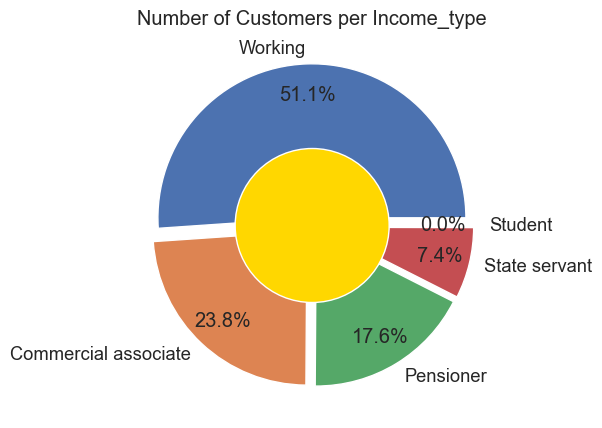

In [10]:
#Check distribution by Income_type


g = a['Income_type'].value_counts()
print(g)

sns.set(font_scale = 1.2)
plt.figure(figsize=(5,5))

plt.title('Number of Customers per Income_type')
labels = ['Working','Commercial associate','Pensioner','State servant','Student']

g = a['Income_type'].value_counts()
plt.pie(g,   autopct='%1.1f%%', labels=labels, explode = [ 0.05, 0.05,0.05,0.05,0.05] ,pctdistance=0.80) 
 
cc = plt.Circle((0, 0), 0.50, fc='gold')
fig = plt.gcf()
 
fig.gca().add_artist(cc)

plt.ylabel('')
plt.show()

**Observation**

- 51.1% of customers get the income from being employed.
- About 3 customers are students.
- 7.4% work for the state.
- 17.6% are pensioners.
- 23.8% income comes from being commercial associates.

Education_type
Secondary / secondary special    6761
Higher education                 2457
Incomplete higher                 371
Lower secondary                   114
Academic degree                     6
Name: count, dtype: int64


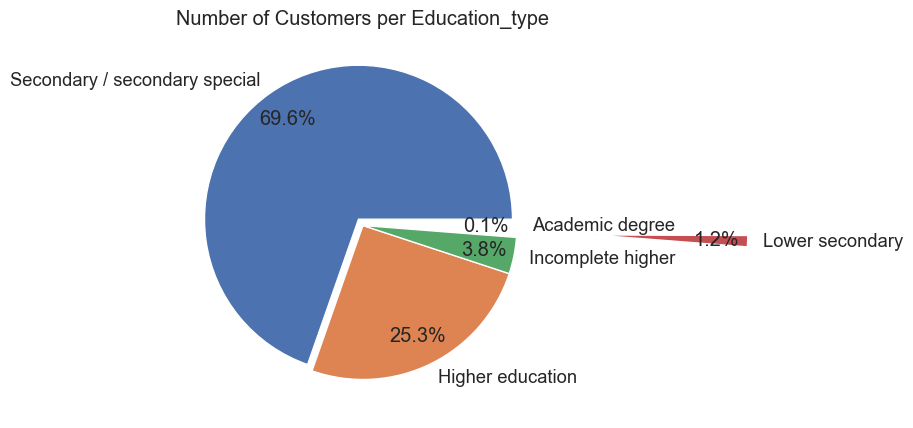

In [11]:
# Distribution of Education_type

g = a['Education_type'].value_counts()
print(g)

sns.set(font_scale = 1.2)
plt.figure(figsize=(5,5))

plt.title('Number of Customers per Education_type')
labels = ['Secondary / secondary special','Higher education','Incomplete higher ',
             'Lower secondary','Academic degree']

g = a['Education_type'].value_counts()
plt.pie(g,   autopct='%1.1f%%', labels=labels, explode = [ 0.05, 0, 0, 1.5, 0.0] ,pctdistance=0.80) 
 
#cc = plt.Circle((0, 0), 0.50, fc='gold')
#fig = plt.gcf()
 
#fig.gca().add_artist(cc)

plt.ylabel('')
plt.show()

**Observation**

- 69.6% of customers hold secondary educations.
- 0.1% have academic degree.
- 1.2% customers have lower secondary.
- 3.8% did not complete higher education.
- 25.3%  have higher education.

Family_status
Married                 6530
Single / not married    1359
Civil marriage           836
Separated                574
Widow                    410
Name: count, dtype: int64


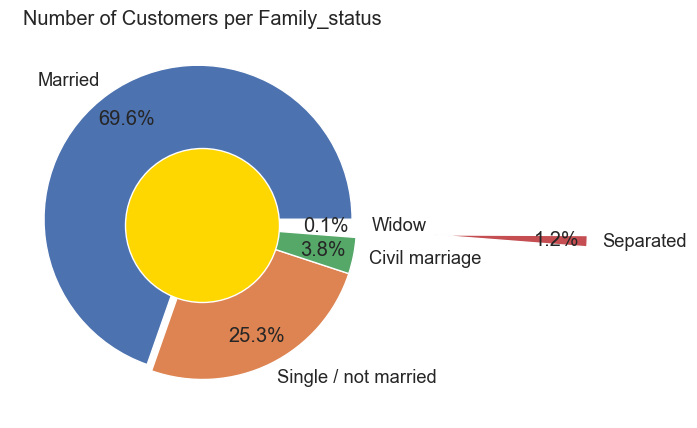

In [12]:
# Distribution of family_status

g = a['Family_status'].value_counts()
print(g)

sns.set(font_scale = 1.2)
plt.figure(figsize=(5,5))

plt.title('Number of Customers per Family_status')
labels = ['Married','Single / not married ','Civil marriage ',
           'Separated','Widow']

g = a['Education_type'].value_counts()
plt.pie(g,   autopct='%1.1f%%' , labels=labels, explode = [ 0.05, 0, 0, 1.5, 0.0] ,pctdistance=0.80) 
 
cc = plt.Circle((0, 0), 0.50, fc='gold')
fig = plt.gcf()
 
fig.gca().add_artist(cc)

plt.ylabel('')
plt.show()

**Observation**

- 69.6% of customers are married.
- 0.1% customers are widows.
- 1.2% customers are separated.
- 3.8% are in civil marriage.
- 25.3%  are single/not married.

Housing_type
House / apartment      8684
With parents            448
Municipal apartment     323
Rented apartment        144
Office apartment         76
Co-op apartment          34
Name: count, dtype: int64


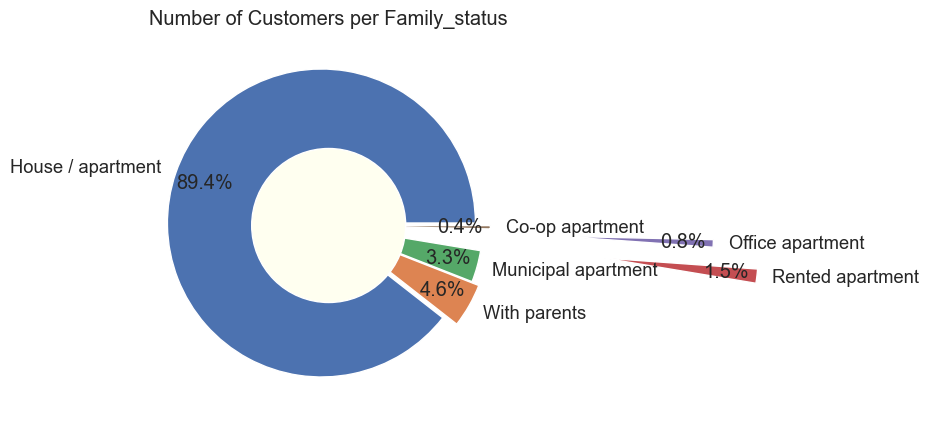

In [13]:
# Distribution of Housing_type

g = a['Housing_type'].value_counts()
print(g)

sns.set(font_scale = 1.2)
plt.figure(figsize=(5,5))

plt.title('Number of Customers per Family_status')
labels = ['House / apartment','With parents ','Municipal apartment ',
          'Rented apartment','Office apartment', 'Co-op apartment']

g = a['Housing_type'].value_counts()
plt.pie(g,   autopct='%1.1f%%', labels=labels, explode = [ 0.05, 0.05, 0, 1.8, 1.5,0.05] ,pctdistance=0.80) 
 
cc = plt.Circle((0, 0), 0.50, fc='ivory')
fig = plt.gcf()
 
fig.gca().add_artist(cc)

plt.ylabel('')
plt.show()

**Observation**

- 89.4% of customers own a house/apartment.
- 0.4% customers are living in a co-op apartment.
- 0.8% customers are living in office apartment.
- 1.5% are in rented apartment.
- 3.3% are in municipal apartment. 
- 4.6%  are living with parents.

Occupation_type
Other                    2994
Laborers                 1724
Sales staff               959
Core staff                877
Managers                  782
Drivers                   623
High skill tech staff     357
Accountants               300
Medicine staff            291
Cooking staff             193
Security staff            182
Cleaning staff            146
Private service staff      86
Low-skill Laborers         53
Secretaries                46
Waiters/barmen staff       40
HR staff                   22
IT staff                   18
Realty agents              16
Name: count, dtype: int64


<Axes: ylabel='Occupation Type'>

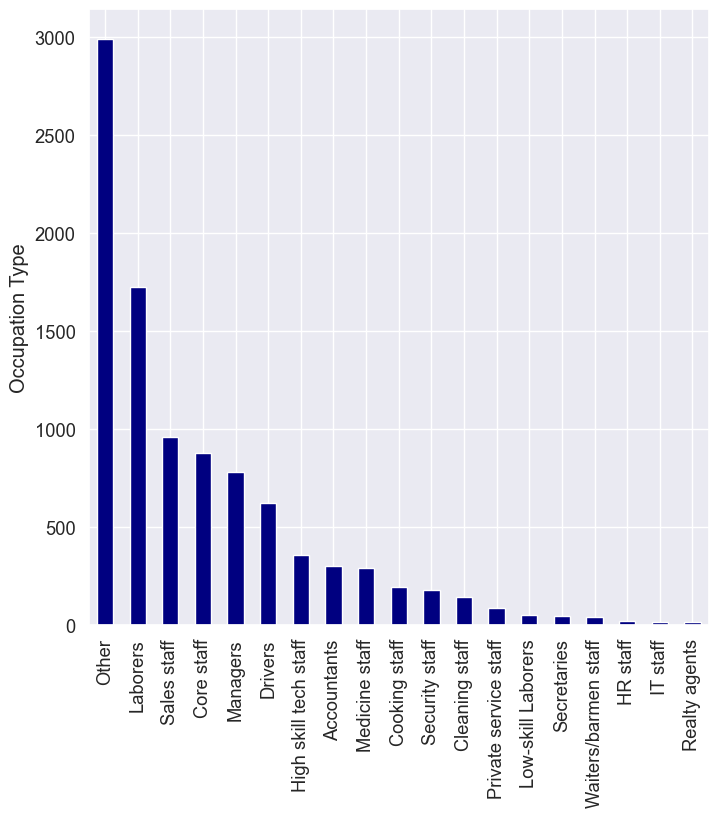

In [14]:
# Distribution of Occupation_type

g = a['Occupation_type'].value_counts()
print(g)

plt.figure(figsize = (8,8))

a['Occupation_type'].value_counts().plot(kind = 'bar', xlabel = '', ylabel = 'Occupation Type', color = 'navy', rot = 90 )


Target
0    8426
1    1283
Name: count, dtype: int64


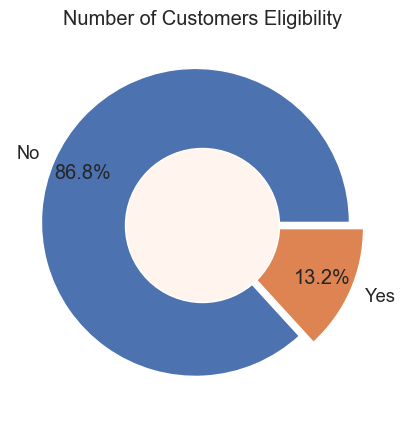

In [15]:
# Distribution of Target, the response variable

g = a['Target'].value_counts()
print(g)

sns.set(font_scale = 1.2)
plt.figure(figsize=(5,5))

plt.title('Number of Customers Eligibility')
labels = ['No','Yes ']

g = a['Target'].value_counts()
plt.pie(g,   autopct='%1.1f%%' , labels=labels, explode = [ 0.05, 0.05], pctdistance=0.80) 


cc = plt.Circle((0, 0), 0.50, fc='seashell')
fig = plt.gcf()
 
fig.gca().add_artist(cc)

plt.ylabel('')
plt.show()

#Class is unbalanced

**Observation**

- 86.8% of customers are not eligible.
- 13.2% customers are eligible.

In [16]:
# Hot encode categorical variables 

a1 = pd.get_dummies(a, columns = ['Income_type','Education_type','Family_status','Housing_type','Occupation_type'], dtype = int)
a1.head()

,Gender,Own_car,Own_property,Work_phone,Phone,Email,Unemployed,Num_children,Num_family,Account_length,...,Occupation_type_Low-skill Laborers,Occupation_type_Managers,Occupation_type_Medicine staff,Occupation_type_Other,Occupation_type_Private service staff,Occupation_type_Realty agents,Occupation_type_Sales staff,Occupation_type_Secretaries,Occupation_type_Security staff,Occupation_type_Waiters/barmen staff
0,1,1,1,1,0,0,0,0,2,15,...,0,0,0,1,0,0,0,0,0,0
1,1,1,1,0,0,0,0,0,2,29,...,0,0,0,0,0,0,0,0,1,0
2,0,0,1,0,1,1,0,0,1,4,...,0,0,0,0,0,0,1,0,0,0
3,0,0,1,0,0,0,1,0,1,20,...,0,0,0,1,0,0,0,0,0,0
4,1,1,1,1,1,1,0,0,2,5,...,0,0,0,0,0,0,0,0,0,0


- One hot encoding was done for all categorical variables.

In [17]:
#Split data into training and testing

from sklearn.model_selection import train_test_split
p = a1.drop('Target', axis = 1)
q = a1['Target']

# Using the train test split function
p_train, p_test, q_train, q_test = train_test_split( p, q, random_state = 100, test_size = 0.20, shuffle = True)


- The response variable is Target, and the indepent variables. The data set is split with 80% for training and 20% for testing.

In [18]:
# Balance the training class using smote

from imblearn.over_sampling import SMOTE

smote = SMOTE(sampling_strategy='minority') 
p_train ,q_train = smote.fit_resample(p,q)
q_train.value_counts()



Target
1    8426
0    8426
Name: count, dtype: int64

- Since our dataset is imbalanced, we implement balacning using the SMOTE algorithm.

In [19]:
# Scaling data since some variables are not on the same scale

from sklearn.preprocessing import StandardScaler

sekala = StandardScaler()

p_train = sekala.fit_transform(p_train)
p_test = sekala.fit_transform(p_test)

In [20]:
# Implementing Naive Bayes

from sklearn.naive_bayes import GaussianNB

nbc = GaussianNB()
nbc.fit(p_train, q_train)


GaussianNB()

In [21]:
# Evaluate the Naive Bayes model

from sklearn.metrics import confusion_matrix,classification_report


eva = nbc.predict(p_test)

# Create a confusion matrix
cm = confusion_matrix(q_test, eva)
print('The confusion matrix is: \n', cm)
print()

# Create a classification report

print(classification_report(q_test, eva))

The confusion matrix is: 
 [[ 579 1095]
 [  95  173]]

              precision    recall  f1-score   support

           0       0.86      0.35      0.49      1674
           1       0.14      0.65      0.23       268

    accuracy                           0.39      1942
   macro avg       0.50      0.50      0.36      1942
weighted avg       0.76      0.39      0.46      1942



**Observation**

The Naive Bayes(NB) model performs very poorly: it massively over-predicts the minority class, achieves low accuracy and F1, and is worse than a trivial baseline, making it unreliable for real-world use.

In [22]:
# Implementing  Support Vector Machine

from sklearn.svm import SVC

vs = SVC(kernel = 'rbf', gamma = 0.2)
vs.fit(p_train, q_train) 



SVC(gamma=0.2)

In [23]:
# Evaluate SVM model

eva1 = vs.predict(p_test)

# Create a confusion matrix
cm1 = confusion_matrix(q_test, eva1)
print('The confusion matrix is: \n', cm1)
print()

# Create a classification report

print(classification_report(q_test, eva1))



The confusion matrix is: 
 [[1663   11]
 [ 212   56]]

              precision    recall  f1-score   support

           0       0.89      0.99      0.94      1674
           1       0.84      0.21      0.33       268

    accuracy                           0.89      1942
   macro avg       0.86      0.60      0.64      1942
weighted avg       0.88      0.89      0.85      1942



**Observation**

The SVM achieves high overall accuracy and excellent performance on the majority class, but severely under-detects the minority class, indicating a conservative decision boundary that favors precision over recall for positive cases.